In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils.value_class import Value
from utils.graph_builder import draw_dot
from IPython.core.display import HTML

# Building the Derivatives Intuition #

This notebook builds the intuition behind derivatives and the chain rule of calculus. These are fundamental concepts at the basis of the rest of the tutorial. 
Intuition is built through numerical examples

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

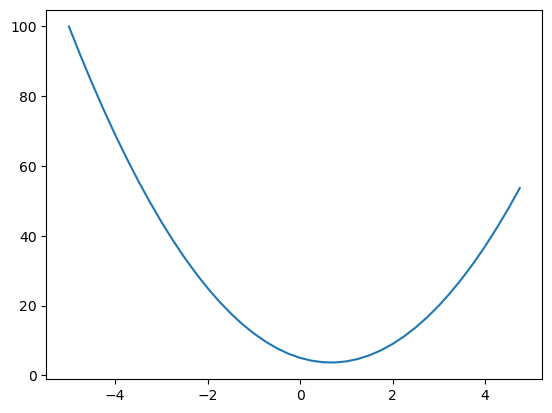

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

what is the derivative link https://en.wikipedia.org/wiki/Derivative of this function at any single point x of this function? Look at the definition of derivative and build an intuition for what it is measuring, and how does it work

In [6]:
h = 0.001
x = 3.0
f(x + h)

20.014003000000002

Normalise over the run to get the slope

In [7]:
h = 0.001
x = 3.0
(f(x + h) - f(x))/h

14.00300000000243

In [8]:
h = 0.001
x = -3.0
(f(x + h) - f(x))/h

-21.996999999998934

complicate things a bit

In [9]:
# let's get more complex

a = 2.0
b = -3.0
c = 10.0
d = a*b + c 
print(d)

4.0


In [10]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h )

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


lets do it with b

In [11]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h )

d1 4.0
d2 4.0002
slope 2.0000000000042206


lets do it with c

In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h )

d1 4.0
d2 4.0001
slope 0.9999999999976694



estimate the gradients numerically for more complex functions

In [13]:
# take this expression that can be seen as a composite function as an example
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [14]:
def lol(): # wrapper function to not pollute the global scope

    h = 0.0001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label = 'a') # adding a small amount to a 
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h) # printing out the derivative of L with respect to a 

In [15]:
lol()

6.000000000021544


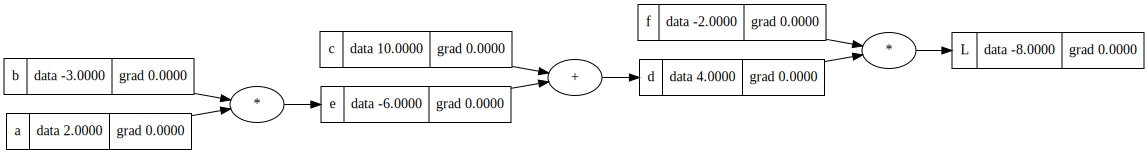

In [16]:
draw_dot(L)

we can in principle just perturb a, b, c, e.. in the lol() function above to numerically estimate their gradients (DL/da..db...dc ..etc), or we can derive those analitically from the chain rule

# The Chain Rule #

At this point, all we need to do is really apply the chain rule from calculus, and derive the gradients at each node. remembering we are interested in how L changes with respect to the change of each individual node, through the interaction of intermediate nodes, when present. 

<div style="display: flex; justify-content: space-around;">

<div style="width: 30%;">
Given:
\begin{align*}
a &= 2.0 \quad \text{(label='a')} \\
b &= -3.0 \quad \text{(label='b')} \\
c &= 10.0 \quad \text{(label='c')} \\
f &= -2.0 \quad \text{(label='f')}
\end{align*}
</div>

<div style="width: 30%;">
We have:
\begin{align*}
e &= a \cdot b \quad \text{(label='e')} \\
d &= e + c \quad \text{(label='d')} \\
L &= d \cdot f \quad \text{(label='L')}
\end{align*}
</div>

<div style="width: 30%;">
Composite functions:
\begin{align*}
e &= g(a, b) = a \cdot b \\
d &= h(e, c) = e + c \\
L &= j(d, f) = d \cdot f \\
L &= j(h(g(a, b), c), f)
\end{align*}
</div>

</div>

The derivative expression of the above functions, applying the chain rule is the following:

<table style="width:100%">
  <tr>
    <td style="width:50%; vertical-align:top;">
      $$
      \begin{aligned}
      \frac{\partial e}{\partial a} &= b \\
      \frac{\partial e}{\partial b} &= a \\
      \frac{\partial b}{\partial d} &= 1 \\
      \frac{\partial e}{\partial d} &= 1 \\
      \frac{\partial c}{\partial c} &= 1 \\
      \frac{\partial L}{\partial d} &= f \\
      \frac{\partial L}{\partial f} &= d \\
      \end{aligned}
      $$
    </td>
    <td style="width:50%; vertical-align:top;">
      $$
      \begin{aligned}
      \frac{\partial L}{\partial a} &= \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial e} \cdot \frac{\partial e}{\partial a} = f \cdot 1 \cdot b = f \cdot b \\
      \frac{\partial L}{\partial b} &= \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial e} \cdot \frac{\partial e}{\partial b} = f \cdot 1 \cdot a = f \cdot a \\
      \frac{\partial c}{\partial d} &= \frac{\partial d}{\partial c} = f \cdot 1 = f \\
      \frac{\partial L}{\partial d} &= \frac{\partial L}{\partial d} = d = e + c = a \cdot b + c
      \end{aligned}
      $$
    </td>
  </tr>
</table>

We can now assign the manually calculated gradients back to our Value objects in their grad property and redisplay the DAG again with the respective gradients at each node

In [17]:
# assigning manually calculated gradients to each Value object
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = 6.0
b.grad = -4.0

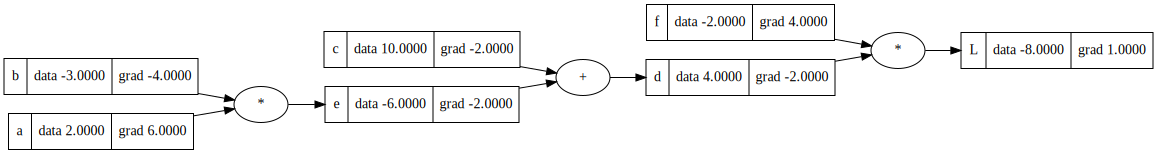

In [18]:
draw_dot(L)

### Optimization Demo

Now we can demonstrate the power of this working now. We want to change the data of our Value objects in such a way to determine a specific effect on L. Specifically, we want L to increase, how do we do that? We slightly nudge each leaf value node in the direction of the respective gradient. Letâ€™s see if that works.

In [19]:
# nudge all the leaf node values in the direction of their gradient
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

# forward pass again
e = a * b
d = e + c
L = d * f

#print out L again, we should expect it to be less negative
print(L.data) 

-7.286496


## Neuron Example ##

Example of manual backpropagation for a neuron. (remember that in real life there would be multiple neurons, layers, wrapped in a loss function and the gradients will be computed with respect to that loss function)

![Alt text](Assets/neuron.jpg)

In [20]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [21]:
# manually derive the individual gradients 

o.grad = 1.0

n.grad = 0.5

x1w1x2w2.grad = 0.5
b.grad = 0.5

x1w1.grad = 0.5
x2w2.grad = 0.5

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

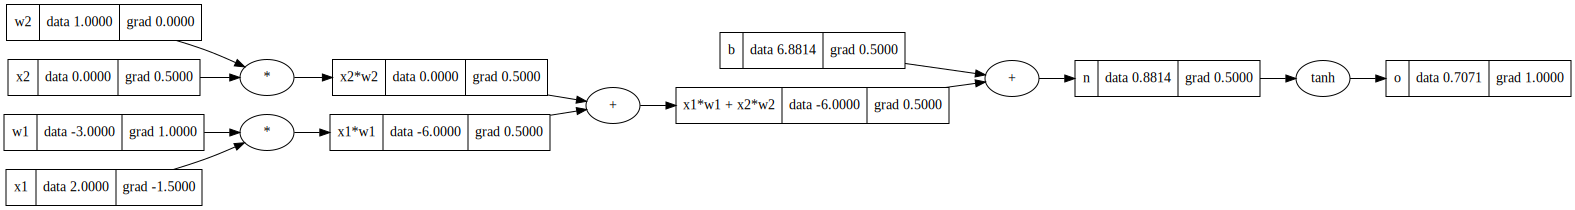

In [22]:
draw_dot(o)